# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Disclaimer:** This notebook was generated by an AI assistant (Minicline) and has not been fully verified by human experts. Please exercise caution when interpreting the code and results. Review the code and consult the original data documentation before drawing firm conclusions.

## Overview of the Dandiset

This Dandiset, identified as `DANDI:000690`, contains data from the Allen Institute Openscope project focusing on the Vision-to-Hippocampus pathway in mice.

**Title:** Allen Institute Openscope - Vision2Hippocampus project

**Description:** The project investigates how neural representations of visual stimuli evolve from the thalamus through visual cortical areas to the hippocampus. It uses Neuropixels probes to record extracellular electrophysiology while presenting simple visual motion stimuli (e.g., moving bars of light with varying parameters) and complex stimuli (movies) to mice.

**Data Types:** The primary data includes extracellular electrophysiology, specifically ElectricalSeries, LFP, ProcessingModule, and Units data, acquired using multi-electrode arrays and processed via filtering and spike sorting. Behavioral data like running speed and eye tracking are also included.

**Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies.

You can find more details about the Dandiset on the DANDI Archive:
[https://dandiarchive.org/dandiset/000690](https://dandiarchive.org/dandiset/000690)

## Notebook Goals

This notebook demonstrates how to:
1. Access metadata about the Dandiset using the DANDI API.
2. Load a specific NWB (Neurodata Without Borders) file from the Dandiset remotely.
3. Explore basic metadata within the NWB file.
4. Load and visualize subsets of behavioral (running speed) and neural (spike times) data.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI Archive)
- `pynwb` (for reading NWB files)
- `h5py` (dependency for pynwb, for HDF5 interaction)
- `remfile` (for efficient remote access to HDF5 data)
- `matplotlib` (for plotting)
- `numpy` (for numerical operations)
- `seaborn` (for enhanced plot styling)

This notebook assumes these packages are already installed in your environment.

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Apply seaborn styling for plots
sns.set_theme()

print("Libraries imported.")

Libraries imported.


## 1. Load Dandiset Information

We can use the `DandiAPIClient` to connect to the DANDI archive and retrieve metadata about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Get the raw metadata
metadata = dandiset.get_raw_metadata()

# Print basic information about the Dandiset
print(f"Dandiset Name: {metadata.get('name', 'N/A')}")
print(f"Dandiset Version: {metadata.get('version', 'N/A')}")
print(f"Description: {metadata.get('description', 'N/A')}")
print(f"Dandiset URL: {metadata.get('identifier', 'N/A')}") # Identifier is the base URL

# List the first few assets in the Dandiset
print("\nListing first 5 assets:")
try:
    assets = list(dandiset.get_assets())
    print(f"Found {len(assets)} assets in the dataset.")
    for asset in assets[:5]:
        # Use asset.identifier to get the asset ID
        print(f"- {asset.path} (ID: {asset.identifier})")
except Exception as e:
    print(f"Error retrieving assets: {e}")

Dandiset Name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset Version: 0.250326.0015
Description: Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, the hippocampal neurons are thought to encode not specific stimuli but instead represent abstract concepts such as space, time and events. How is this abstraction computed in the mouse brain? Specifically, how does the representation of simple visual stimuli evolve from the thalamus, which is a synapse away from the retina, through primary visual cortex, higher order visual areas and all the way to hippocampus, that is farthest removed from the retina?

The current OpenScope project aims to understand how the neural representations of simple and natural stimuli evolve from the LGN through V1, and most hippocampal regions, as well as some of the frontal areas. 

Stimuli presented
Two main

## 2. Load an NWB File Remotely

This Dandiset contains multiple NWB files, often organized by subject and session. We will load one specific NWB file to explore its contents.

We will focus on the file: `sub-692072/sub-692072_ses-1298465622.nwb`

Its Asset ID is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`.

To access the data efficiently without downloading the entire large file, we use the `remfile` library in conjunction with `h5py` and `pynwb`.

In [3]:
# Define the URL for the specific NWB asset
nwb_asset_id = "fbcd4fe5-7107-41b2-b154-b67f783f23dc"
nwb_url = f"https://api.dandiarchive.org/api/assets/{nwb_asset_id}/download/"
print(f"NWB File URL: {nwb_url}")

# Generate the Neurosift link for interactive exploration
neurosift_link = f"https://neurosift.app/nwb?url={nwb_url}&dandisetId=000690&dandisetVersion=draft"
print(f"Explore this file interactively on Neurosift: {neurosift_link}")

# Use remfile to open the remote NWB file
print("\nOpening remote NWB file stream...")
try:
    remote_file = remfile.File(nwb_url)
    h5_file = h5py.File(remote_file, mode='r')

    # Use pynwb to read the file structure
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True)
    nwb = io.read()
    print("NWB file loaded successfully.")

    # Display some basic metadata from the file
    print(f"\nSession Description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Start Time: {nwb.session_start_time}")
    print(f"Subject ID: {nwb.subject.subject_id}")
    print(f"Subject Age: {nwb.subject.age}")
    print(f"Subject Sex: {nwb.subject.sex}")

except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb = None # Ensure nwb is None if loading failed
    # Try closing handles if they were opened
    try:
        io.close()
    except: pass
    try:
        h5_file.close()
    except: pass

NWB File URL: https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/
Explore this file interactively on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

Opening remote NWB file stream...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.

Session Description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00
Subject ID: 692072
Subject Age: P82D
Subject Sex: M


## 3. Visualize Behavioral Data: Running Speed

The NWB file contains processed behavioral data, such as the mouse's running speed. Let's plot a subset of this data to see the activity pattern. We load only a subset to avoid potentially long loading times for the full dataset over the network.

Found running speed data with units: cm/s
Loading first 30000 points of running speed data...
Successfully loaded 30000 data points.
Generating plot...


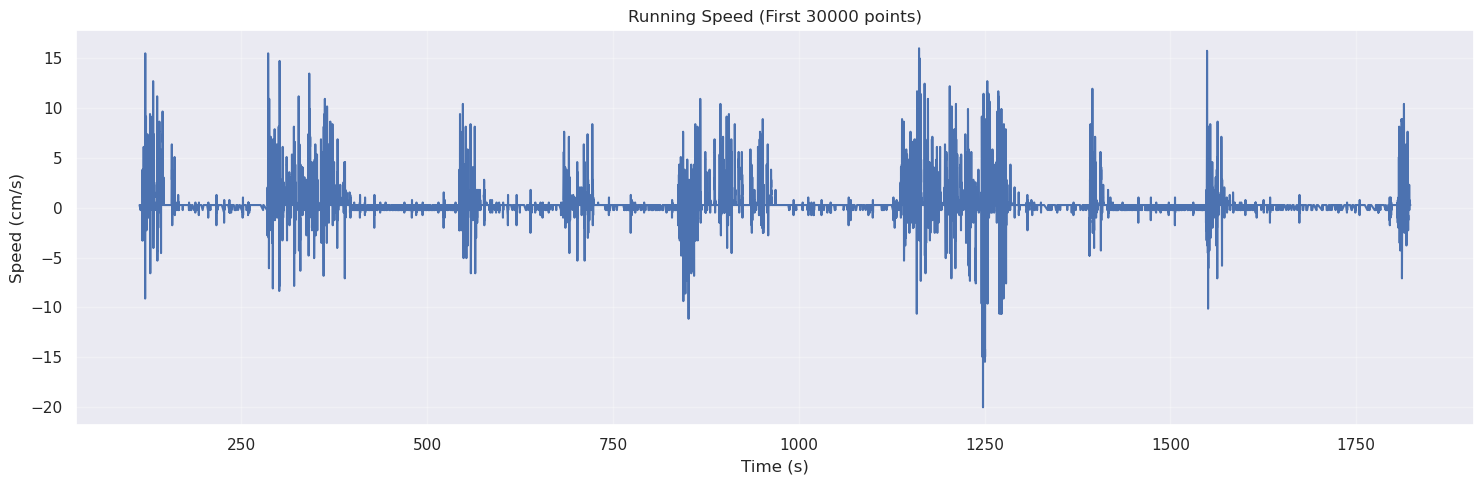

In [4]:
if nwb:
    try:
        # Access running speed data and timestamps
        if 'running' in nwb.processing and 'running_speed' in nwb.processing['running'].data_interfaces:
            running_speed_ts = nwb.processing['running']['running_speed']
            print(f"Found running speed data with units: {running_speed_ts.unit}")

            # Load a subset of the data (e.g., first 30000 points)
            num_points_to_load = 30000
            total_points = len(running_speed_ts.data)
            points_to_load = min(num_points_to_load, total_points)

            print(f"Loading first {points_to_load} points of running speed data...")
            speed_data = running_speed_ts.data[:points_to_load]
            timestamps = running_speed_ts.timestamps[:points_to_load]
            print(f"Successfully loaded {len(speed_data)} data points.")

            # Create the plot
            print("Generating plot...")
            fig, ax = plt.subplots(figsize=(15, 5))
            ax.plot(timestamps, speed_data)
            ax.set_title(f'Running Speed (First {len(speed_data)} points)')
            ax.set_xlabel('Time (s)')
            ax.set_ylabel(f'Speed ({running_speed_ts.unit})')
            ax.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        else:
            print("Running speed data not found in nwb.processing['running']['running_speed']")

    except Exception as e:
        print(f"Error plotting running speed: {e}")
else:
    print("NWB file not loaded, skipping running speed plot.")

## 4. Visualize Neural Data: Spike Times Raster Plot

The NWB file also contains sorted spike data in the `units` table. We can visualize the firing patterns of a few selected units using a raster plot. Again, we'll select a subset of units and load only their spike times.

Note: The time axis of the following plot represents time in seconds relative to the `timestamps_reference_time` defined in the NWB file, which may be different from the session start time shown earlier. The absolute values can be large, but the plot illustrates the relative timing of spikes.

Units table found with 2764 units.
Selected 15 units with IDs: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
Loading spike times for selected units...
Spike times loaded.
Generating raster plot...


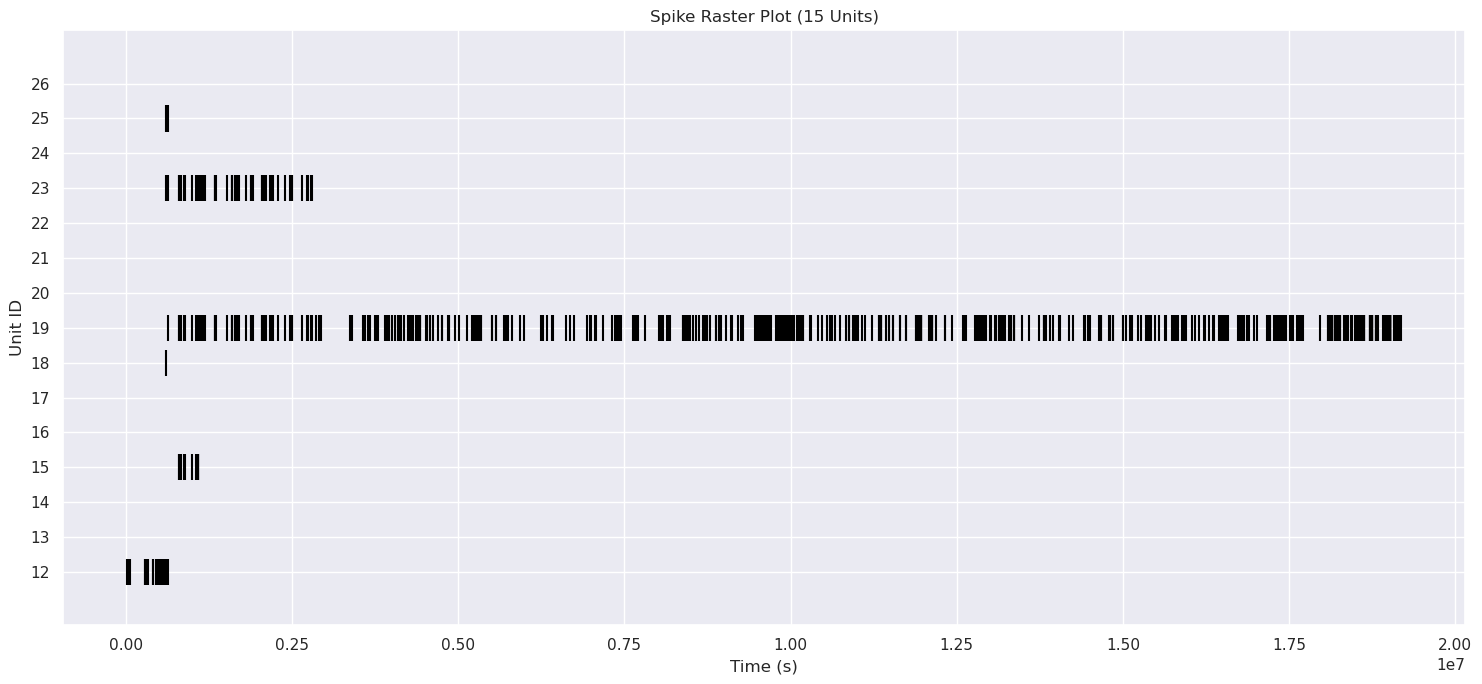

In [5]:
if nwb:
    try:
        # Access the units table
        if nwb.units:
            units_table = nwb.units
            print(f"Units table found with {len(units_table.id[:])} units.")

            # Select a subset of units (e.g., first 15 available)
            num_units_to_plot = 15
            unit_indices_to_plot = list(range(min(num_units_to_plot, len(units_table.id[:]))))
            unit_ids_to_plot = units_table.id[unit_indices_to_plot]
            print(f"Selected {len(unit_ids_to_plot)} units with IDs: {list(unit_ids_to_plot)}")

            # Load spike times for the selected units
            spike_times_list = []
            print("Loading spike times for selected units...")
            spike_times_data = units_table['spike_times'].data
            spike_times_index = units_table['spike_times_index']
            num_all_spikes = len(spike_times_data)

            for i in unit_indices_to_plot:
                # Corrected indexing logic based on critique
                idx = units_table.id[:].tolist().index(unit_ids_to_plot[i]) # Get the index in the original table for the selected unit ID
                start_index_val = spike_times_index[idx-1][0] if idx > 0 else 0
                end_index_val = spike_times_index[idx][0]

                # Ensure indices are standard Python integers and within bounds
                start_index = max(0, int(start_index_val))
                end_index = min(num_all_spikes, int(end_index_val))

                # Slice the spike_times dataset
                spike_times = spike_times_data[start_index:end_index]
                spike_times_list.append(spike_times)
            print("Spike times loaded.")

            # Create the raster plot
            print("Generating raster plot...")
            fig, ax = plt.subplots(figsize=(15, 7))
            ax.eventplot(spike_times_list, color='black', linelengths=0.75)

            ax.set_yticks(range(len(unit_ids_to_plot)))
            ax.set_yticklabels(unit_ids_to_plot)
            ax.set_ylabel('Unit ID')
            ax.set_xlabel('Time (s)')
            ax.set_title(f'Spike Raster Plot ({len(unit_ids_to_plot)} Units)')
            plt.tight_layout()
            plt.show()

        else:
            print("Units table not found in NWB file.")

    except Exception as e:
        print(f"Error plotting spike raster: {e}")
else:
    print("NWB file not loaded, skipping spike raster plot.")

## 5. Summary and Future Directions

This notebook demonstrated the basic steps to access and explore Dandiset 000690. We loaded metadata, accessed a specific NWB file remotely, viewed some of its metadata, and visualized subsets of running speed and spike time data.

**Potential Next Steps:**
- Explore other NWB files within the Dandiset corresponding to different subjects, sessions, or probes.
- Investigate the extensive stimulus information available in `nwb.intervals` to align neural activity with specific visual stimulus presentations. The `tools_cli.py nwb-file-info` output showed many stimulus presentation tables (e.g., `SAC_Wd15...`, `natmovie...`).
- Analyze other recorded data types, such as Local Field Potentials (LFP) or eye-tracking data (`nwb.acquisition['EyeTracking']`).
- Perform more detailed analysis on the `units` table, examining properties like waveform characteristics, firing rates across different conditions, or correlations between units.
- Correlate neural activity (spike times) with behavioral data (running speed).

Remember that loading large datasets remotely requires careful consideration of the data size. Loading subsets or performing computations server-side (if possible) might be necessary for more complex analyses.

In [6]:
# Clean up: Close the NWB file handles
try:
    if 'io' in locals() and io is not None:
        io.close()
        print("NWB IO closed.")
    if 'h5_file' in locals() and h5_file is not None:
        h5_file.close()
        print("H5 file closed.")
    if 'remote_file' in locals() and remote_file is not None:
        # remfile does not have an explicit close, relies on garbage collection
        pass
except Exception as e:
    print(f"Error during cleanup: {e}")

print("\nNotebook execution finished.")

NWB IO closed.
H5 file closed.

Notebook execution finished.
